<a href="https://colab.research.google.com/github/diegogr98/Diego-Gutierrez-Astronomy/blob/main/Neas_CRTBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor**: Diego Gutiérrez



<br>

**Objetivo**: Vamos a estudiar la órbita osculatriz de los asteroides cercanos a la Tierra o NEAs y su descripción en términos del CRTBP.


**Procedimiento**:

1. En principio, un asteroide se considera *cercano a la Tierra* (o NEA, por su sigla en inglés, *Near Earth Asteroid*) si su órbita puede cruzar la órbita de la Tierra. Demuestre que para que la órbita de un asteroide cumpla está condición se debe dar que $q<Q_\oplus$  y que $Q>q_\oplus$, donde $q$ y $Q$ son las distancias al periapsis y al apoapsis de un cuerpo en una órbita.

2. Haga un gráfico en el plano $e$-$a$ (estando $e$, la excentricidad en el eje y, y $a$ el semiejemayor en el eje x). Que muestre las órbitas para las cuáles $q=Q_\oplus$, $Q=q_\oplus$ y que haga un sombreado de las órbitas que cumplen la condición de cruzar la órbita de la Tierra.

3. Una condición dinámica más precisa para definir cuando un asteroide es una NEA, consiste tiene que ver con la constante de Jacobi o equivalentemente con el parámetro de Tisserand asociado al sistema Sol-Tierra:

  $$
  T \equiv \frac{a_\oplus}{a}+2 \cos i \sqrt{\left(\frac{a}{a_\oplus}\right)\left(1-e^2\right)}
  $$
  o en términos del $a$ relativo del asteroide, $\bar{a}=a/a_\oplus$
  $$
  T \equiv \frac{1}{\bar{a}}+2 \cos i \sqrt{\bar{a}\left(1-e^2\right)}
  $$

  Demuestre que para asteroides con inclinación orbital $i=0$ la excentricidad de la órbita de los asteroides que tienen constante de Tisserand constante, $T$, cumple:

  $$
  e=\sqrt{1-\frac{1}{4 \bar{a}^3 \cos ^2 i}(T \bar{a}-1)^2}
  $$

4. Haga un gráfico en el diagrama $e-a$ que hizo en 2 mostrando la ubicación en el diagrama de las curvas definidas por la ecuación en 3, cuando $T=2.5, 3.0, 3.5$. Compare las curvas resultantes con las que obtuvo en el punto 2. ¿Qué observa?

5. En el archivo que encontrarán [este enlace](https://drive.google.com/file/d/1jKxVp8v-q4G11UVpy6wtoPYyv6VKNSLr/view?usp=sharing) están los elementos osculantes de más de 37000 NEAs conocidas.  Calcule para cada asteroide el parámetro de Tisserand. Dibuje la ubicación de estos asteroides en el diagrama $e-a$ incluyendo las curvas calculadas en 2 y 5. ¿Qué observa?.

6. **(Opcional)** Escoja de la base de datos de Asteroides todos los asteroides que tengan parámetro de Tisserand cercano de 3.0 y dibuje las órbitas de esos asteroides en el sistema rotante Sol-Tierra. Observe si existe alguna regularidad o si los asteroides tienen orbitas completamente arbitrarias.


##*Punto 1: demostración de que los NEA's cumplen que: $q<Q_\oplus$  y que $Q>q_\oplus$.*

*Esta demostración se realizará de manera computacional observando 3 cuerpos diferentes, el primero es un asteroide que cumpla las dos condiciones necesarias con las que se define un NEA, los otros dos cumpliendo solo una de las condiciones, al final se realizará la gráfica de las órbitas para observar los comportamientos*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, M_sun
from scipy.optimize import fsolve

In [2]:
#definindo parámetros orbitales de la tierra y los asteroides
a_t = 1.000
e_t = 0.0167
q_t = a_t * (1 - e_t)
Q_t = a_t * (1 + e_t)

# Asteroide 1: Cumple ambas condiciones (NEA)
a_a1 = 1.2
e_a1 = 0.3
q_a1 = a_a1 * (1 - e_a1)  # Perihelio
Q_a1 = a_a1 * (1 + e_a1)  # Afelio

# Asteroide 2: No cumple la condición q_a2 < Q_⊕ (NO NEA)
a_a2 = 1.2
e_a2 = 0.1
q_a2 = a_a2 * (1 - e_a2)
Q_a2 = a_a2 * (1 + e_a2)
print(f'El valor de Q_⊕ es:  {Q_t:.3f}')
print(f'El valor de q_a2 es:  {q_a2:.3f}')

# Asteroide 3: No cumple la condición Q_a3 > q_⊕ (NO NEA)
a_a3 = 0.9
e_a3 = 0.05
q_a3 = a_a3 * (1 - e_a3)
Q_a3 = a_a3 * (1 + e_a3)
print('-'*40)
print(f'El valor de q_⊕ es:  {q_t:.3f}')
print(f'El valor de Q_a3 es:  {Q_a3:.3f}')

El valor de Q_⊕ es:  1.017
El valor de q_a2 es:  1.080
----------------------------------------
El valor de q_⊕ es:  0.983
El valor de Q_a3 es:  0.945


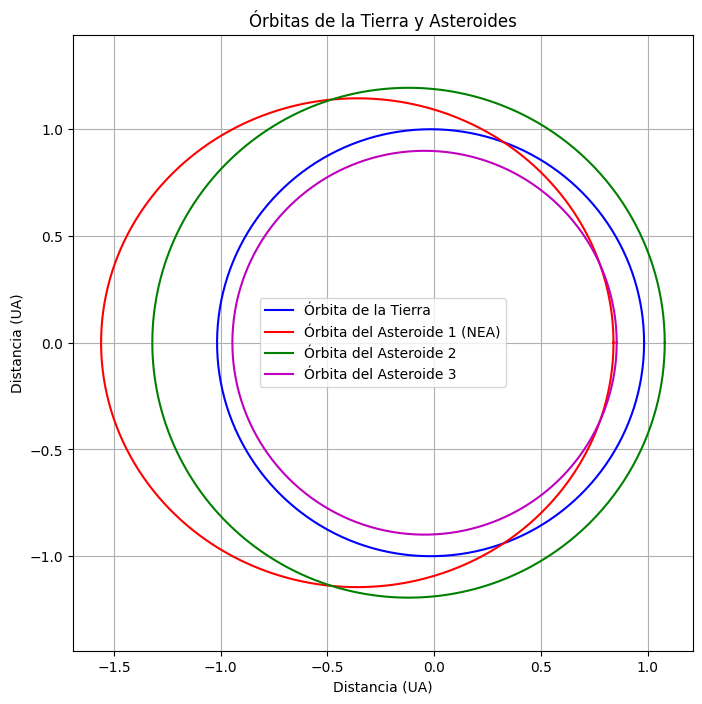

In [3]:
# Función para graficar las órbitas
def orbita(a, e, label, color):
    theta = np.linspace(0, 2*np.pi, 500)
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta))
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    plt.plot(x, y, color, label=label)


# Crear la figura
plt.figure(figsize=(8, 8))

# Graficar las órbitas
orbita(a_t, e_t, 'Órbita de la Tierra', 'b')
orbita(a_a1, e_a1, 'Órbita del Asteroide 1 (NEA)', 'r')
orbita(a_a2, e_a2, 'Órbita del Asteroide 2', 'g')
orbita(a_a3, e_a3, 'Órbita del Asteroide 3', 'm')

# Configuración del gráfico
plt.xlabel('Distancia (UA)')
plt.ylabel('Distancia (UA)')
plt.title('Órbitas de la Tierra y Asteroides')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()

### *Análisis del gráfico de las órbitas*

*Como se observa en el gráfico, la única órbita que cruza la trayectoria de la Tierra es la del asteroide que cumple ambas condiciones (representada en rojo). Esto concuerda con la definición de un NEA (Near-Earth Asteroid)*

*Las otras dos órbitas no intersectan la de la Tierra:*  
- *Una de ellas no cumple  $q<Q_\oplus$,
 lo que significa que su periapsis está demasiado alejado de la Tierra.*  
- *La otra no cumple $Q>q_\oplus$, lo que indica que su apoapsis está demasiado cerca del Sol para cruzar la órbita terrestre.*  

*Esto demuestra gráficamente la validez de las condiciones matemáticas necesarias para que un asteroide sea clasificado como NEA.*


##*Punto 2: gráfico de e-a donde se cumple:( $q=Q_\oplus$, $Q=q_\oplus$)sombreando aquellas orbitas que cruzan la órbita terrestre*

*Teniendo en cuenta que: $q = a(1-e)$ y $Q = a(1+e)$, se puede despejar a en cada caso y graficar*

In [4]:
#defiendo valores de excentricidad
es = np.linspace(0.01, 0.99, 100)

#Condición q = Q_⊕
def a1(e):
  return Q_t/(1+e)

#condición Q = q_⊕
def a2(e):
  return q_t/(1-e)

a1s = a1(es)
a2s = a2(es)

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:4: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-4221534389.py:3: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
/tmp/ipython-input-4221534389.py:4: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')


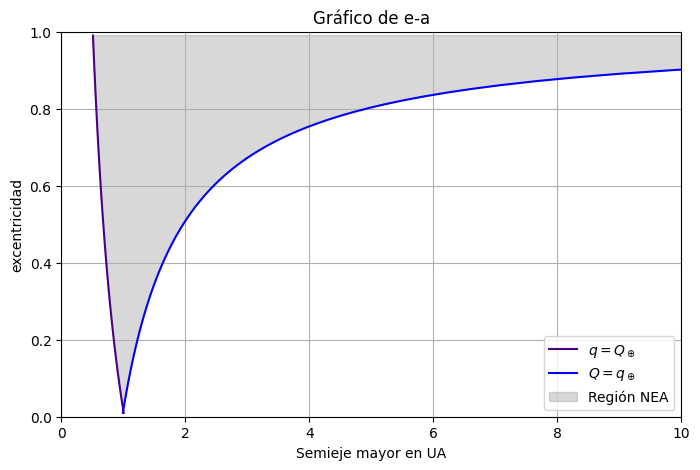

In [5]:
plt.figure(figsize=(8, 5))
#Graficando las rectas
plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')

# Sombrear la región donde se cumple q < Q_⊕ y Q > q_⊕
plt.fill_betweenx(es, a1s, a2s,
                  where=(a1s < a2s),
                  color='gray',
                  alpha=0.3,
                  label='Región NEA')

# Especificaciones para mejor visualización
plt.xlabel('Semieje mayor en UA')
plt.ylabel('excentricidad')
plt.title('Gráfico de e-a')
plt.legend()
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.grid()
plt.show()

##*Punto 3: demostración de el valor de excentricidad dependiente de T*

*Para demostrar el valor de excentricidad, partimos de la definición del parámetro de Tisserand T*:
  $$
  T \equiv \frac{1}{\bar{a}}+2 \cos i \sqrt{\bar{a}(1-e^2)}
  $$


*Tomando T constante se tiene que*
  $$
  T = \frac{1}{\bar{a}}+2 \cos i \sqrt{\bar{a}(1-e^2)}
  $$

  $$
  T-\frac{1}{\bar{a}} = 2 \cos i \sqrt{\bar{a}(1-e^2)}
  $$
\\
  $$
  \frac {T-\frac{1}{\bar{a}}}{2 \cos i} =  \sqrt{\bar{a}(1-e^2)}
  $$

\\
*Multiplicando y dividiendo por ${\bar{a}}$, la parte izquierda*


  $$
  \frac {T\bar{a}-1}{2\bar{a}  \cos i} = \sqrt{\bar{a}(1-e^2)}
  $$

\\
*Elevando al cuadrado ambos lados*

  $$
  \frac {(T\bar{a}-1)^2}{4\bar{a}^2  \cos^2 i} = \bar{a}(1-e^2)
  $$

\\
  $$
  \frac {(T\bar{a}-1)^2}{4\bar{a}^3  \cos^2 i} =1-e^2
  $$

\\
*Finalmente despejando e, se tiene que*:

  $$
  e= \sqrt{1- \frac {(T\bar{a}-1)^2}{4\bar{a}^3  \cos^2 i} }
  $$

*Como la inclinación es $i=0$, se puede simplificar a:*

  $$
  e= \sqrt{1- \frac {(T\bar{a}-1)^2}{4\bar{a}^3 } }
  $$


##*Punto 4: diagrama de las curvas (plano e-a) definidas por la ecuación en el punto 3, cuando $T=2.5, 3.0, 3.5$.*

In [6]:
# Creamos valores de semieje mayor entre 0.01 y 10
a_as = np.linspace(0.01, 10, 100)
a_bar = a_as / a_t  # Relación de semieje mayor

# Función para calcular la excentricidad
def excentricidad(a, T):
    return np.sqrt(1 - ((T * a - 1) ** 2) / (4 * a**3))

# Valores de Tisserand a evaluar
Ts = [2.5, 3.0, 3.5]

# prompt: con la funcion de excentricidad y los valores de T, filtrar los datos para poder graficarlos
datos = {}

for T in Ts:
    e_vals = excentricidad(a_bar, T)

    # Filtrar NaN
    mask = ~np.isnan(e_vals)  # Máscara que es True donde NO hay NaN
    a_bar_filtrado = a_bar[mask]  # Filtrar valores de 'a'
    e_vals_filtrado = e_vals[mask]  # Filtrar excentricidades

    datos[T] = (a_bar_filtrado, e_vals_filtrado)

/tmp/ipython-input-3658881640.py:7: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - ((T * a - 1) ** 2) / (4 * a**3))


<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:9: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-3128314807.py:9: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
/tmp/ipython-input-3128314807.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')


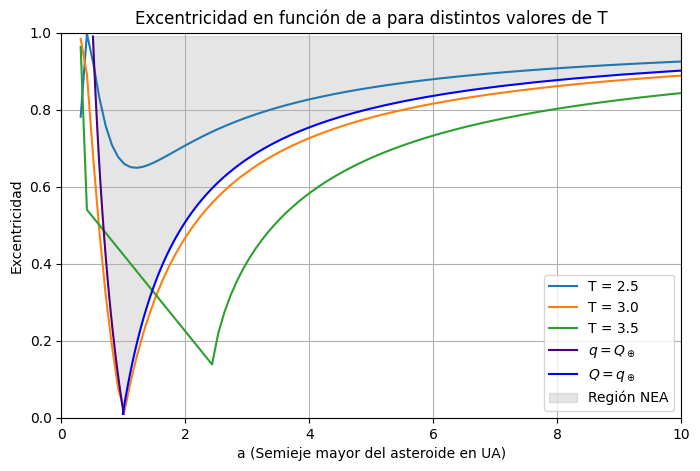

In [7]:
#Crear el grafico
plt.figure(figsize=(8, 5))

#Graficar las curvas dependientes de T
for T, (a_vals, e_vals) in datos.items():
    plt.plot(a_vals, e_vals, label=f"T = {T}")

#Graficando las rectas del punto 2
plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')

# Sombrear la región donde se cumple q < Q_⊕ y Q > q_⊕
plt.fill_betweenx(es, a1s, a2s,
                  where=(a1s < a2s),
                  color='gray',
                  alpha=0.2,
                  label='Región NEA')
plt.xlabel("a (Semieje mayor del asteroide en UA)")
plt.ylabel("Excentricidad")
plt.title("Excentricidad en función de a para distintos valores de T")
plt.xlim(0, 10)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

*Se puede observar, comparando los resultados del punto 2 con las curvas de excentricidad obtenidas a partir del parámetro de Tisserand, que el valor de 𝑇 que mejor se ajusta a la definición anterior de NEA es $T=3.0$ (representado en color naranja). Esto sugiere que los objetos con un parámetro de Tisserand cercano a 3 pueden ser clasificados como NEOs o NEAs.*

*Por otro lado, la curva obtenida para $T=3.5$ (graficada en color verde) presenta una discontinuidad en torno a $e≈0.2$ y $a≈1$ .Este comportamiento anómalo sugiere que, en esta región, los valores calculados difieren de lo esperado, posiblemente debido a la aproximación usada con $i=0$, lo que podría generar valores complejos dentro de la raiz*

##*Punto 5:calculando el parámetro de Tisserand y haciendo el diagrama e-a para los 37000 NEAs del dataframe*

In [8]:
#Descargando el archivo directamente
!gdown 1jKxVp8v-q4G11UVpy6wtoPYyv6VKNSLr

Downloading...
From: https://drive.google.com/uc?id=1jKxVp8v-q4G11UVpy6wtoPYyv6VKNSLr
To: /content/NEAs-feb_26_2025.csv
100% 2.76M/2.76M [00:00<00:00, 39.4MB/s]


In [9]:
#creando un dataframe con pandas
df = pd.read_csv('/content/NEAs-feb_26_2025.csv')
df

,spkid,full_name,epoch_mjd,a,e,i,om,w,ma
0,20000433,433 Eros (A898 PA),60800,1.4580,0.2227,10.83,304.27,178.92,198.60
1,20000719,719 Albert (A911 TB),60800,2.6360,0.5467,11.57,183.86,156.20,194.53
2,20000887,887 Alinda (A918 AA),60800,2.4730,0.5712,9.40,110.41,350.52,30.88
3,20001036,1036 Ganymed (A924 UB),60800,2.6660,0.5330,26.68,215.48,132.50,52.27
4,20001221,1221 Amor (1932 EA1),60800,1.9200,0.4346,11.87,171.24,26.76,345.77
...,...,...,...,...,...,...,...,...,...
37765,54520917,(2025 DD8),60730,2.5230,0.7436,9.58,267.95,345.67,343.73
37766,54520915,(2025 DE8),60731,0.9724,0.1780,28.35,153.16,250.19,92.85
37767,54520916,(2025 DF8),60800,1.1310,0.1619,6.29,346.77,230.94,10.70
37768,54520918,(2025 DL8),60800,1.5870,0.3653,6.31,347.54,195.81,22.21


In [10]:
#definiendo los arrays necesarios para calcular T
as_df = df['a'].values
es_df = df['e'].values
is_df = np.deg2rad(df['i'].values)

#Función que calcula T
def calcular_T(a, e, i):
    return (1 / a) + np.abs(2 * np.cos(i) * np.sqrt(a * (1 - e**2)))

#Hallando el valor de T
Ts = calcular_T(as_df, es_df, is_df)
Ts

array([2.99824526, 3.04304862, 2.95127972, ..., 2.97044699, 2.96130989,
       2.864685  ])

<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
<>:10: SyntaxWarning: invalid escape sequence '\o'
<>:11: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipython-input-1982006489.py:10: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
/tmp/ipython-input-1982006489.py:11: SyntaxWarning: invalid escape sequence '\o'
  plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')


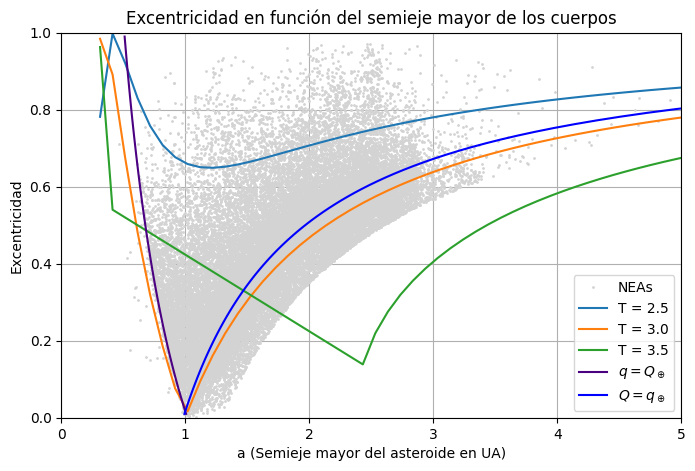

In [11]:
#Graficando todos los asteroides en el diagrama e-a
plt.figure(figsize=(8, 5))
plt.plot(as_df, es_df, 'o', color='lightgray', markersize=1, label='NEAs')

#Graficar las curvas dependientes de T
for T, (a_vals, e_vals) in datos.items():
    plt.plot(a_vals, e_vals, label=f"T = {T}")

#Graficando las rectas del punto 2
plt.plot(a1s, es, label='$q=Q_\oplus$',color='indigo')
plt.plot(a2s,es, label='$Q=q_\oplus$',color='blue')

#Detalles del gráfico
plt.xlabel("a (Semieje mayor del asteroide en UA)")
plt.ylabel("Excentricidad")
plt.title("Excentricidad en función del semieje mayor de los cuerpos")
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.show()

##*Punto 6: graficando las órbitas de los asteroides con T≈3.0 en el sistema rotante Sol-Tierra*

In [12]:
#Filtrando los datos para aquellos donde T ≈ 3.0
indices_cercanos = np.argsort(np.abs(Ts - 3))[:5]

T = Ts[indices_cercanos]
# Filtrar asteroides con T ≈ 3.0
df_filtrado = df.iloc[indices_cercanos].copy()

df_filtrado = df_filtrado.assign(T=T)
df_filtrado

,spkid,full_name,epoch_mjd,a,e,i,om,w,ma,T
33868,54408081,(2023 WK2),60800,2.010,0.4533,8.06,34.42,92.06,158.50,2.999982
23214,54017316,(2020 KJ7),60800,1.288,0.1923,3.35,113.92,188.32,97.69,3.000030
9565,3610175,(2012 TF79),60800,1.050,0.0381,1.01,199.85,265.74,161.34,2.999965
28532,54248246,(2022 DX),60800,1.112,0.0888,0.20,152.14,28.92,239.25,2.999964
26349,54161070,(2021 LL9),59380,2.150,0.4941,6.17,230.60,72.12,347.49,2.999944


In [13]:
# Función para calcular la órbita en el sistema rotante
def calcular_orbita(a, e, I, omega, OMEGA, M0, n_points=100):

    # Anomalía media en varios puntos de la órbita
    M = np.linspace(0, 2 * np.pi, n_points)

    # Resolver la ecuación de Kepler para obtener la anomalía excéntrica E
    def kepler(E, M, e):
        return E - e * np.sin(E) - M
    E = np.array([fsolve(kepler, M_,
                         args=(M_, e))[0] for M_ in M])

    # Anomalía verdadera
    f = 2 * np.arctan2(np.sqrt(1+e) * np.sin(E/2), np.sqrt(1-e) * np.cos(E/2))

    # Radio orbital
    r = a * (1 - e**2) / (1 + e * np.cos(f))

    #terminos repetidos en ambas ecuaciones
    term1 = np.sin(omega + f) * np.cos(I)
    term2 = np.cos(omega + f)

    x = r * (np.cos(OMEGA) * term2 - np.sin(OMEGA) * term1)
    y = r * (np.sin(OMEGA) * term2 + np.cos(OMEGA) * term1)

    return x, y

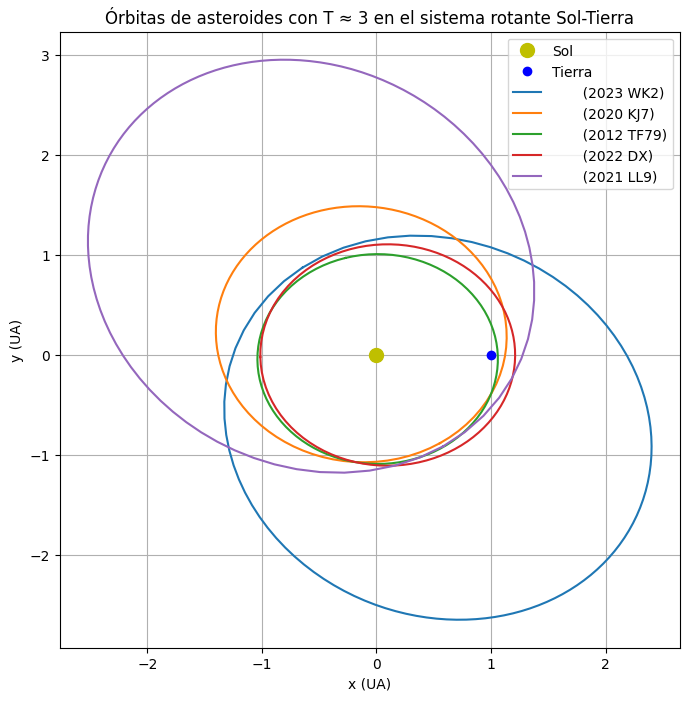

In [14]:
# prompt: Ayudame a graficar las órbitas en el sistema rotante Sol-Tierra
plt.figure(figsize=(8, 8))
plt.plot(0, 0, 'yo', markersize=10, label="Sol")  # Sol
plt.plot(a_t, 0, 'bo', markersize=6, label="Tierra")  # Tierra

for _, row in df_filtrado.iterrows():
    x, y = calcular_orbita(row["a"], row["e"],
                           np.radians(row["i"]),
                           np.radians(row["w"]),
                           np.radians(row["om"]),
                           row["ma"])
    plt.plot(x, y, label=f"{row['full_name']}")

plt.xlabel("x (UA)")
plt.ylabel("y (UA)")
plt.title("Órbitas de asteroides con T ≈ 3 en el sistema rotante Sol-Tierra")
plt.legend()
plt.grid()
plt.show()